<a href="https://colab.research.google.com/github/mahesh-keswani/pytorch-example-notebook/blob/main/2_PytorchMooresLaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Latex subscript:
# $x_{2}$

# Latex superscript:
# $x^{2}$

The Moore's is a term used to refer to the observation made by Gordon Moore in 1965 that the number of transistors in a dense integrated circuit (IC) doubles about every two years.

C = current transistor count
<br /> $C_{0}$= initial transistor count
<br /> r = rate of increase
<br /> t = input time
<br />
i.e we can formulate it as <br />C = $C_{0}$$r^{t}$



In [3]:
# Data: https://www.kaggle.com/datasets/pascalhouba/moores-law
filePath = "/content/transistors.csv"
data = pd.read_csv(filePath)
data.head()

,Year,Transistors
0,1971.875000,2.308242
1,1972.307692,3.554522
2,1974.326923,6.097562
3,1979.567308,29.163776
4,1982.307692,135.772714


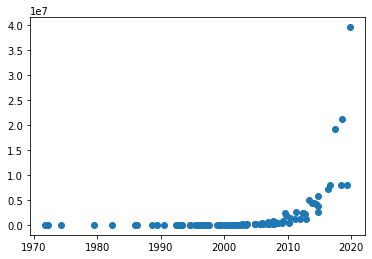

In [4]:
X = data['Year'].values
Y = data['Transistors'].values

# We can see the exponential growth
plt.scatter(X, Y);

Lets make the exponential data into linear by log-transformation.

C = $C_{0}$$r^{t}$
<br />
logC = t * log(r) + log$C_{0}$
<br />
This seems like linear equation, with (a, b) as parameters
<br/>y    = x * a      + b

In [5]:
Y = np.log(Y)

# Also we have to normalize the data as well 
meanX = X.mean()
meanY = Y.mean()
stdX = X.std()
stdY = Y.std()

# we are storing these parameters for inverse transformations
X = (X - meanX) / stdX
Y = (Y - meanY) / stdY

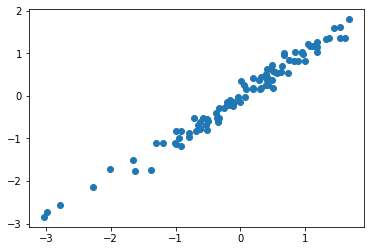

In [6]:
# Now we get the linear data
plt.scatter(X, Y);

In [7]:
# again, lets create the model
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.7)

In [8]:
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

inputs = torch.from_numpy( X.astype(np.float32))
targets = torch.from_numpy( Y.astype(np.float32))

In [9]:
EPOCHS = 100
losses = []
for i in range(EPOCHS):
    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    losses.append( loss.item() )

    loss.backward()
    optimizer.step()

    if (i + 1) % 10 == 0:
        print(f"Epoch {i}/{EPOCHS}, loss {loss.item()}")

Epoch 9/100, loss 1.0180553197860718
Epoch 19/100, loss 0.20934052765369415
Epoch 29/100, loss 0.05498175323009491
Epoch 39/100, loss 0.0284331813454628
Epoch 49/100, loss 0.02394239977002144
Epoch 59/100, loss 0.02318486198782921
Epoch 69/100, loss 0.023057136684656143
Epoch 79/100, loss 0.023035602644085884
Epoch 89/100, loss 0.023031972348690033
Epoch 99/100, loss 0.023031359538435936


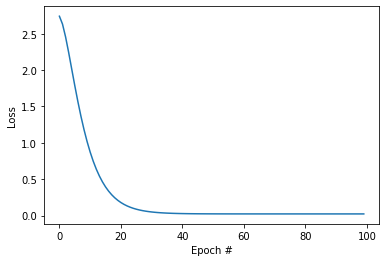

In [10]:
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.plot(losses);

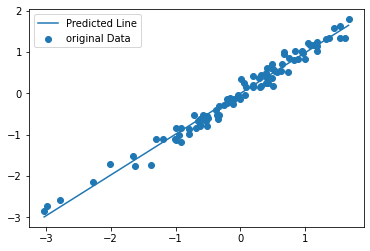

In [11]:
predictions = model(inputs).detach().numpy()

plt.scatter(X, Y, label = "original Data")
plt.plot(X, predictions, label = "Predicted Line")
plt.legend();

In [12]:
# Now lets get the slope of line and verify the Moore's law
# This represents the log(r)
w = model.weight.data.numpy()

# This represents the logCo, the intercept
b = model.bias.data.numpy()

print(w, b)

[[0.9881043]] [7.696594e-05]


In [13]:
# As we know after normalization, 
# y' = (y - meanY)             x' = (x - meanX)
#      -----------                  ------------
#         stdY                         stdX

# Our Model is 
# y' = w * x' + b
# Lets substitute the values of y' and x' in the above model
# (y - meanY)         (x - meanX)
# ----------- = w * -------------- + b
#   stdY                stdX

# After you solve for y
# y = w *  stdY  * x + some_constant_term
#         ------
#          stdX

# i.e our slope is
# w * (stdY / stdY) = log(r)

In [14]:
logr = w[0, 0] * (stdY / stdX)
print(logr)

0.3474202715008937


log(r) = 0.347
<br />i.e r = $e^{0.347}$

In [15]:
# Now lets find the time after which the capacitor count doubles
r = np.exp( 0.347 )

In [16]:
print(r)

1.4148167253704287


In [17]:
# Now we can calculate time after which transistor count doubles
# C = C0 * (1.414)^t    .... (1)
# 2C = C0 * (1.414)^t'  .... (2)
# t' = time which we want to find

# lets divide equation 2 with equation 1
# 2 = (1.414)^(t' - t)
# by taking log
# log2 = (t' - t) * log(1.414)
# (t' - t) = log2 / log(1.414)
# i.e t' = t + ( log2 / log(1.414) )